## Homework #4:  Ocean Mesoscale Eddies
In this problem set you will work with real and "synthetic" data to understand more about the ocean's mesoscale fluctuations and its role in tracer transport

## 1) Southern Ocean Heat Transport

A very rough model of the Southern Ocean overturning is wind-driven Ekman pumping pushing warm water northward (out of the Southern Ocean) near the surface and geostrophic transport below the depth of topography providing the return flow, as depicted in the schematic below.  Based on this representation, answer a-e.

![so](southern_ocean.png)

If you want to read about these dynamics in more detail, the Abernathy text book has a very nice [chapter linked here].(https://rabernat.github.io/intro_to_physical_oceanography/southern_ocean.html)

a. Recalling that Ekman transport is

$V_{Ek} = -\frac{\tau_x}{\rho_0 f}$,

Assume that the zonal wind strength averages 0.1 N m$^{-2}$. **Find the net Ekman-driven volume transport out of the Southern Ocean near 55°S**.  Give you answer in Sv. (You will need to integrate around the circumference of the Earth at 55°S.)

b. Assuming that the volume of the Southern Ocean is in steady state and that the sum of evaporation, precipitation and runoff is approximately zero, the inflow below the Ekman layer must equal the outflow you solved for in the Ekman layer. If this flow were entirely geostrophic, it would be accomplished by circulation below the average depth of the topography (as depicted in the schematic).  If the deep flow has an average temperature of 2°C and the Ekman layer has an average temperature of 10°C, **what would be the heat transport by the flow across 55°S**. Give your answer in PW (10$^{15}$ W). Explain your sign convention.


c. **Calculate the required average air-sea heat flux (in $W/m^2$) south of 55°S needed to balance the heat budget**, using a surface area of 2.6e13 $m^2$ Explain your sign convention.

d. **Compare your answer to the observed air-sea flux** [from the text](https://rabernat.github.io/intro_to_physical_oceanography/03_air_sea_exchange.html) of about 10 $W/m^2$ OUT of the ocean (i.e. ocean to atmosphere heat loss).  Your answer should be quite different, owing to eddy fluxes, which we haven't yet accounted for.

Suppose the eddy transport can be represented by the parameterization of Gent and McWilliams (1998), so that the eddy-induced velocity scales as

$v_{eddy} = \frac{A_H}{h} \frac{\Delta z}{\Delta y}$

where $A_H$ is the isopycnal diffusitivity, $h$ is the thickness of the layer, and $\frac{\Delta z}{\Delta y}$ is the slope of the isopycnal in the cross-ACC direction. 

Estimating a mean isopynal slope from [Figure 3 in the textbook chapter on Southern Ocean Circulation](https://rabernat.github.io/intro_to_physical_oceanography/southern_ocean.html) of $\frac{\Delta z}{\Delta y}$ = 1000 m / 1000 km = 1e-3, a thickness of the warm layer of 1000 m, and $A_H = 1000 m^2 s^{-1}$, first **estimate the eddy velocity (also known as the bolus velocity, $u^*$)**.



e.  Assuming this is a zonal average velocity and it goes to zero south of 55°S so the heat flux convergence due to eddies can be estimated as $hL_xc_p\rho (u^*T_{55°S})$, **estimate the eddy heat flux due to this term**.

## 2) Data Analysis

- **a.**  **Load in the weekly, gridded altimeter data in the Aghulas region.**  You may use the matfile provided separately to proceed in Matlab or follow the steps for Python below. It contains sea level anomaly (sla), and geostrophic zonal and meridiona velocities (ugos, vgos).  
- **b.**  **Plot the sea level anomaly data** and estimate the size of a mesoscale eddy from it.  **Provide that estimate as a radius of the feature in km.**
- **c.**  **Estimate the Rossby radius** for the Aghulas region - you may estimate the stratification from the [figure here](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022JC019413). Compare your answer to the visual estimate. Did you have to adjust anything in your calculation to get them to be similar?
- **d.** Let's explore the data! **Calculate the EKE for each week**.
    - Plot a time series of EKE averaged over the region 30S - 40S, 10E-20E and its 1-year running mean.
    - Hypothesize about the possible implications of the variability you see with respect to heat fluxes in the region.  (I have provided enough code to get you most of the way there).


In [11]:
#Load in the data, which was provided as a matfile
!pip install h5py
import h5py
import numpy as np
import xarray as xr
file_path = '/Users/jaimepalter/Downloads/Agulhas_CapeBasin_ssh_30yr.mat'  #your local path to the data here
f = h5py.File(file_path, 'r')
# Step 2: See top-level structure
print("Top-level keys:", list(f.keys()))

Top-level keys: ['#refs#', 'SSH_data']


In [12]:
#display the variables in the array, so you know what you need to extract
ssh_group = f['SSH_data']
print("SSH_data keys:", list(ssh_group.keys()))

SSH_data keys: ['adt', 'lat', 'lon', 'mt', 'note', 'sla', 'ugos', 'vgos']


In [13]:
# Extract each variable
lat = np.array(ssh_group['lat']).squeeze()
lon = np.array(ssh_group['lon']).squeeze()
mt = np.array(ssh_group['mt']).squeeze() #time in matlab date format
adt = np.array(ssh_group['adt'])  # absolute dynamic topography [m] 
sla = np.array(ssh_group['sla'])  # sea level anomaly [m]
ugos = np.array(ssh_group['ugos']) # zonal geostrophic velocity [m/s]
vgos = np.array(ssh_group['vgos']) # meridional geostrophic velocity [m/s]

#convert matlab time to Python
import numpy as np
import pandas as pd

# MATLAB datenum to datetime (days since 0000-01-01, Python uses 1970-01-01)
# MATLAB datenum's epoch is 0000-01-01, but Python starts at 1970 — need to shift
# MATLAB day 1 == 0000-01-01 → we subtract 366 days to align with 0001-01-01
calendar_time = pd.to_datetime(mt - 719529, unit='D')  # 719529 = days from 0000-01-01 to 1970-01-01

In [14]:
# Create an xarray of sea level anomaly
ds = xr.Dataset(
    {'sla': (['time', 'lat', 'lon'], sla)},
    coords={'lat': lat,'lon': lon,'time':calendar_time}
)

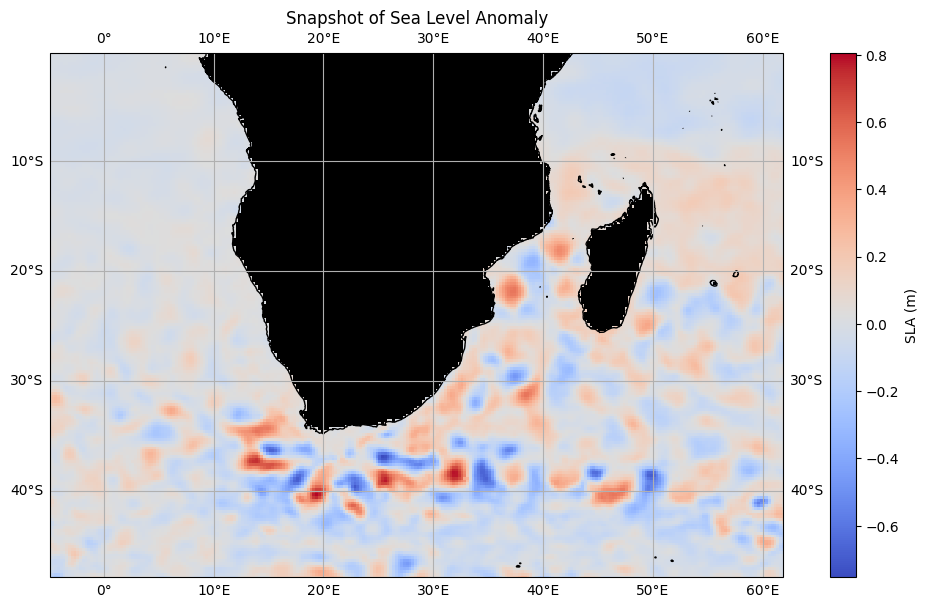

In [15]:
#Make a pretty map of a single snapshot of sea level anomaly, useful for seeing the spatial scale of an eddy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assume SSH_data is your xarray.Dataset and contains 'lat', 'lon', and 'sla'
lat = ds['lat']
lon = ds['lon']
sla = ds['sla'].isel(time=0)  # snapshot (like SLA(:,:,1) in MATLAB)

# Broadcast lat/lon if they're 1D
if lat.ndim == 1 and lon.ndim == 1:
    lon2d, lat2d = np.meshgrid(lon, lat)
else:
    lon2d, lat2d = lon, lat

# Set up the plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set lat/lon limits (like MapLatLimit / MapLonLimit in MATLAB)
ax.set_extent([float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())], crs=ccrs.PlateCarree())

# Plot the SLA
im = ax.pcolormesh(lon, lat, sla, shading='auto', cmap='coolwarm', transform=ccrs.PlateCarree())

# Add features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='black')
ax.gridlines(draw_labels=True)

# Title and colorbar
plt.title("Snapshot of Sea Level Anomaly")
plt.colorbar(im, orientation='vertical', label='SLA (m)')

plt.tight_layout()
plt.show()


In [16]:
# Make the zonal geostrophic velocity into an xarray, which makes it easier to work with
ds_u = xr.Dataset(
    {'ugos': (['time', 'lat', 'lon'], ugos)},
    coords={'lat': lat,'lon': lon,'time': calendar_time}
)

In [17]:
ds_v = xr.Dataset(
    {'vgos': (['time', 'lat', 'lon'], vgos) },
    coords={'lat': lat,'lon': lon,'time': calendar_time  }
)


In [23]:
v_ave = ds_v['vgos'].mean(dim='time')
u_ave = ds_u['ugos'].mean(dim='time')
u_anom = ds_u['ugos'] - u_ave
v_anom = ds_v['vgos'] - v_ave

#You now have everything you need to calculate EKE.  I've left off this step to make sure you remember how to do it.

#Once you calculate EKE, take its time mean to make a nice plot
mean_EKE = EKE.mean(dim='time')

In [ ]:

# PLOT map of mean EKE
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set lat/lon limits (like MapLatLimit / MapLonLimit in MATLAB)
ax.set_extent([float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())], crs=ccrs.PlateCarree())

# Plot the SLA
im = ax.pcolormesh(lon, lat, mean_EKE, shading='auto', cmap='coolwarm', transform=ccrs.PlateCarree())

# Add features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='black')
ax.gridlines(draw_labels=True)

# Title and colorbar
plt.title("EKE")
plt.colorbar(im, orientation='vertical', label='EKE (m2/s2)')

plt.tight_layout()
plt.show()

In [ ]:
# Select spatial subset 
EKE_subset = EKE.sel(
    lat=slice(-40, -30),
    lon=slice(10, 20)
)

# Take spatial mean to get a time series  - you can model this line on the one above where you took the time mean

In [ ]:
#Calculate 1-year running mean to better see low-frequency variability and make a nice plot
EKE_smoothed = EKE_timeseries.rolling(time=52, center=True).mean()

EKE_timeseries.plot(label='Raw', color='grey', linewidth=1)
EKE_smoothed.plot(label='4-Week Running Mean', color='black', linewidth=1)

plt.title("EKE Time Series with 1-Month Running Mean")
plt.ylabel("EKE (m2/s2)")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()
